# DASC 512 - 22 - Normality Tests

***

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms  # Note this is a new addition
import statsmodels.graphics.api as smg

sns.set_style('whitegrid')

In [2]:
norm_sample = stats.norm.rvs(loc=0,scale=1,size=100)
chi2_sample = stats.chi2.rvs(df=5, size=100)
expon_sample = stats.expon.rvs(scale=1, size=100)

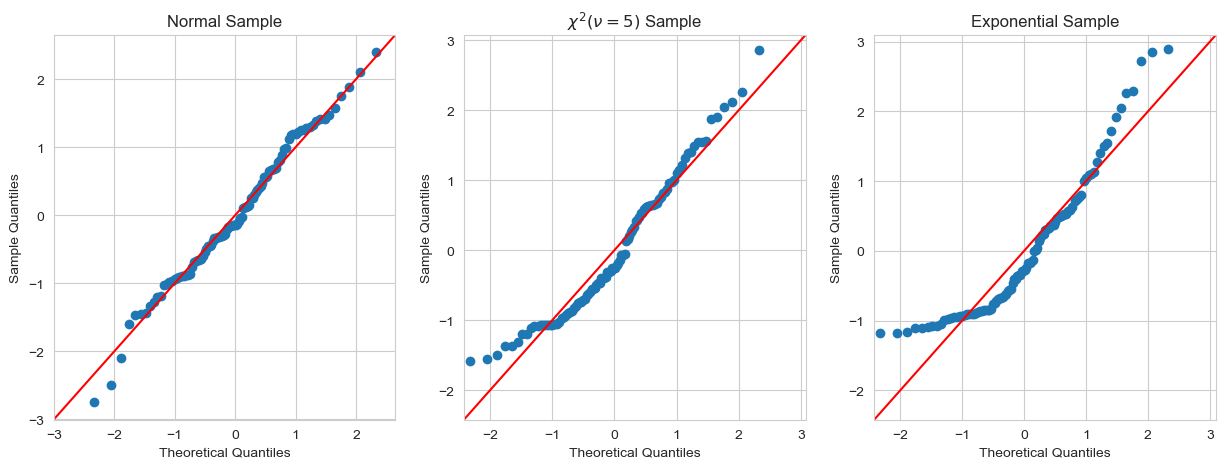

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sm.qqplot(data=norm_sample, dist=stats.norm, fit=True, line='45', ax=ax1)
sm.qqplot(data=chi2_sample, dist=stats.norm, fit=True, line='45', ax=ax2)
sm.qqplot(data=expon_sample, dist=stats.norm, fit=True, line='45', ax=ax3)
ax1.set_title('Normal Sample')
ax2.set_title(r'$\chi^2(\nu=5)$ Sample')
ax3.set_title('Exponential Sample')
plt.show()

In [96]:
def plot_normtest_sensitivity(
    dist,
    alpha = 0.1,
    nlist=[10, 25, 50, 75, 100, 250, 500, 1000], 
    bigN=250
):
    shapiro = []
    lilliefors = []
    ks = []
    omnibus = []
    for n in nlist:
        shap = []
        lill = []
        kstemp = []
        omni = []
        for _i in range(bigN):
            sample = dist.rvs(size=n)
            shap.append(stats.shapiro(sample)[1])
            lill.append(sms.lilliefors(sample)[1])
            kstemp.append(stats.kstest(sample, 'norm')[1])
            omni.append(stats.normaltest(sample)[1])
        shapiro.append(sum(np.array(shap) < alpha) / bigN)
        lilliefors.append(sum(np.array(lill) < alpha) / bigN)
        ks.append(sum(np.array(kstemp) < alpha) / bigN)
        omnibus.append(sum(np.array(omni) < alpha) / bigN)
    df = pd.DataFrame({'n':nlist, 'Shapiro':shapiro, 'Lilliefors':lilliefors,
                       'KS':ks, 'Omnibus':omnibus})
    fig, ax = plt.subplots(figsize=(6,3))
    ax.plot('n','Shapiro',data=df)
    ax.plot('n', 'Lilliefors', data=df)
    ax.plot('n','KS',data=df)
    ax.plot('n','Omnibus',data=df)
    ax.legend()
    ax.set_title(f'Varying positive-test rate by Sample Size (alpha={alpha})')
    ax.set_ylabel('Proportion concluding non-normal')
    ax.set_xlabel('Sample Size')
    plt.show()

C:\Users\weimp\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


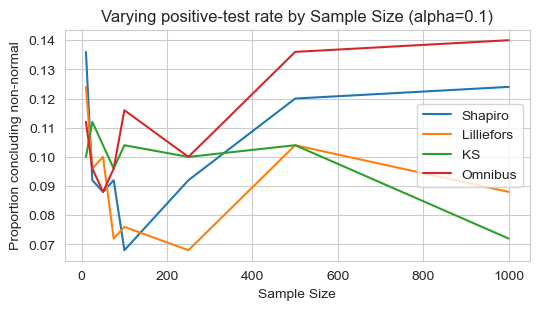

In [97]:
plot_normtest_sensitivity(stats.norm())

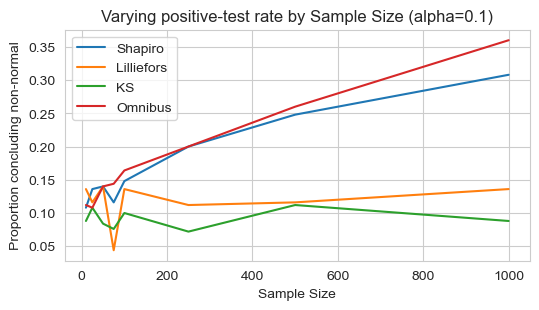

In [98]:
plot_normtest_sensitivity(stats.t(df=29))

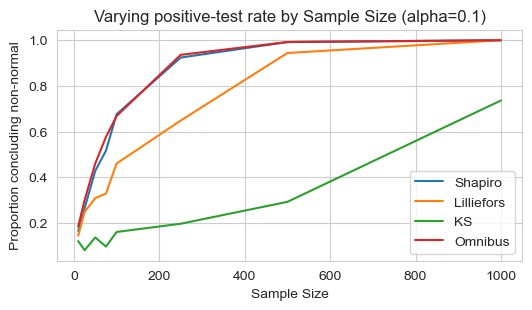

In [99]:
plot_normtest_sensitivity(stats.t(df=5))

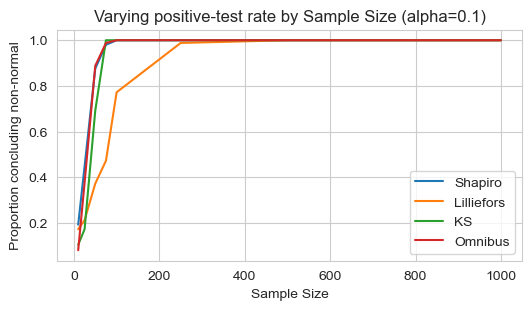

In [100]:
plot_normtest_sensitivity(stats.uniform(loc=-1,scale=2))

Given data, use the following to run a particular test:

In [101]:
sample = stats.cauchy.rvs(size=20)

In [102]:
stat, pval = stats.shapiro(sample)
print(pval)

0.3557317852973938


In [103]:
stat, pval = stats.normaltest(sample)
print(pval)

0.24910468166059369


In [104]:
stat, pval = stats.kstest((sample-np.mean(sample))/np.std(sample,ddof=1), cdf='norm')
print(pval)

0.6405467054741403


In [105]:
stat, crit_vals, sig_levs = stats.anderson((sample-np.mean(sample))/np.std(sample,ddof=1), dist='norm')
print(stat)
print(pd.DataFrame({'Significance':sig_levs, 'Critical Values':crit_vals}))

0.4740314917666879
   Significance  Critical Values
0          15.0            0.506
1          10.0            0.577
2           5.0            0.692
3           2.5            0.807
4           1.0            0.960


# That's all for this lesson!